<a href="https://colab.research.google.com/github/codenihar/whatsappchatanalyser/blob/main/whatsappchat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import regex
import datetime
from collections import Counter
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Defining functions

In [ ]:
def date_time(line):
    date_time_obj = None
    try:
        date_time_obj = datetime.datetime.strptime(line[:line.index('-')].strip(), '%d/%m/%y, %I:%M %p')
    except ValueError:
        pass
    return date_time_obj is not None

def find_author(s):
    s = s.split(":")
    if len(s)==2:
        return True
    else:
        return False

def getDatapoint(line):
    splitline = line.split(' - ')
    dateTime = splitline[0]
    date, time = dateTime.split(", ")
    message = " ".join(splitline[1:])
    if find_author(message):
        splitmessage = message.split(": ")
        author = splitmessage[0]
        message = " ".join(splitmessage[1:])
    else:
        author= None
    return date, time, author, message

# Downloading chat, Opening chat and creating Data Frame

In [ ]:
! gdown --id (id here)

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1mX5Gx4KkLoLPW-8mtgPSB8DrIPfT__JF
To: /content/WhatsApp Chat with Honey.txt
100% 36.9k/36.9k [00:00<00:00, 73.5MB/s]


In [ ]:
data = []
conversation = '/content/WhatsApp Chat with Honey.txt'
with open(conversation, encoding="utf-8") as fp:
    fp.readline()
    messageBuffer = []
    date, time, author = None, None, None
    while True:
        line = fp.readline()
        if not line:
            break
        line = line.strip()
        if date_time(line):
            if len(messageBuffer) > 0:
                data.append([date, time, author, ' '.join(messageBuffer)])
            messageBuffer.clear()
            date, time, author, message = getDatapoint(line)
            messageBuffer.append(message)
        else:
            messageBuffer.append(line)

Printing DataFrame

In [ ]:
df = pd.DataFrame(data, columns=["Date", 'Time', 'Author', 'Message'])
df['Date'] = pd.to_datetime(df['Date'])
print(df.tail(20))
print(df.info())
print(df.Author.unique())

          Date      Time       Author  \
286 2023-04-04  12:12 AM  niihaaarrrr   
287 2023-04-04  12:16 AM  niihaaarrrr   
288 2023-04-04  12:16 AM  niihaaarrrr   
289 2023-04-04  12:16 AM  niihaaarrrr   
290 2023-04-04  12:16 AM  niihaaarrrr   
291 2023-04-04  12:16 AM  niihaaarrrr   
292 2023-04-04  12:16 AM  niihaaarrrr   
293 2023-04-04  12:16 AM  niihaaarrrr   
294 2023-04-04  12:16 AM  niihaaarrrr   
295 2023-04-04  12:16 AM  niihaaarrrr   
296 2023-04-04   8:35 AM       Honey🐒   
297 2023-04-04   8:35 AM  niihaaarrrr   
298 2023-04-04   8:35 AM  niihaaarrrr   
299 2023-04-04   8:36 AM       Honey🐒   
300 2023-04-04   8:36 AM  niihaaarrrr   
301 2023-04-04   8:37 AM       Honey🐒   
302 2023-04-04   8:37 AM       Honey🐒   
303 2023-04-04   8:37 AM  niihaaarrrr   
304 2023-04-04   8:38 AM  niihaaarrrr   
305 2023-04-04   8:52 AM         None   

                                               Message  
286                                    <Media omitted>  
287                     

Printing Total Messages

In [ ]:
total_messages = df.shape[0]
print(total_messages)

306


Printing Media Messages

In [ ]:
media_messages = df[df["Message"]=='<Media omitted>'].shape[0]
print(media_messages)

80


Printing Information

In [ ]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: regex.findall(URLPATTERN, x)).str.len()
links = np.sum(df.urlcount)

print("Chats between Nihar and Honey")
print("Total Messages: ", total_messages)
print("Number of Media Shared: ", media_messages)
print("Number of Links Shared: ", links)

Chats between Nihar and Honey
Total Messages:  306
Number of Media Shared:  80
Number of Links Shared:  11


In [ ]:
media_messages_df = df[df['Message'] == '<Media omitted>']
messages_df = df.drop(media_messages_df.index)
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

l = ["niihaaarrrr", "Honey🐒"]
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Average Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)

Stats of niihaaarrrr -
Messages Sent 118
Average Words per message 19.635593220338983
Media Messages Sent 62
Links Sent 5
Stats of Honey🐒 -
Messages Sent 102
Average Words per message 12.303921568627452
Media Messages Sent 18
Links Sent 2


Both

There are 3927 words in all the messages.


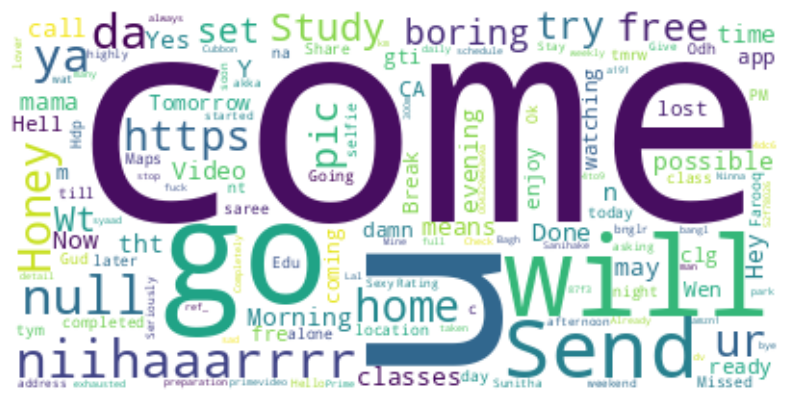

In [ ]:
text = " ".join(review for review in messages_df.Message if not re.search(r'Media omitted', review))
print ("There are {} words in all the messages.".format(len(text)))
stopwords = set(STOPWORDS)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
# Display the generated image:
# the matplotlib way:
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Individual

Author name niihaaarrrr


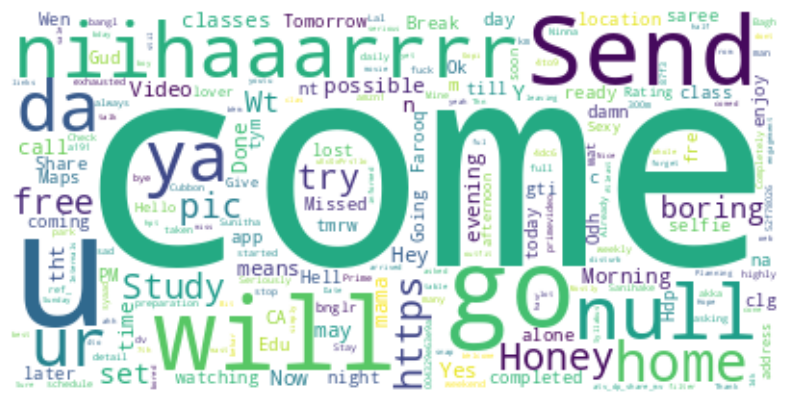

Author name Honey🐒


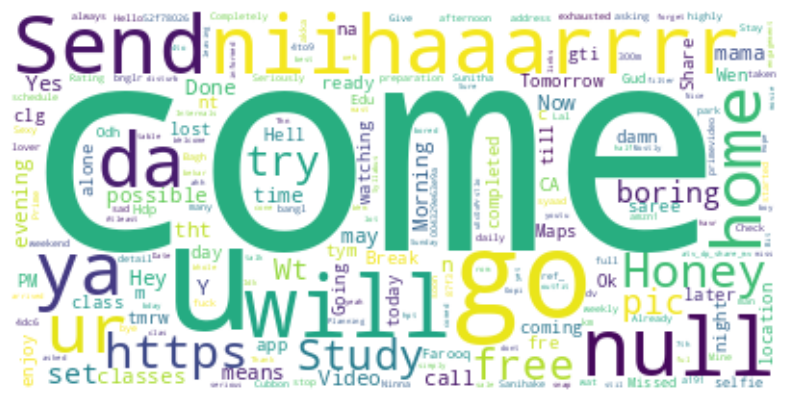

In [ ]:
l = ["niihaaarrrr", "Honey🐒"]
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  text = " ".join(review for review in messages_df.Message if not re.search(r'Media omitted', review))
  stopwords = set(STOPWORDS)
  #Generate a word cloud image
  print('Author name',l[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
  #Display the generated image   
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()